In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/Users/jianingjin/Desktop/data analysis/Python/housing.csv")

In [122]:
#glimpse of data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [124]:
# drop null values
data.dropna(inplace = True)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [126]:
#training and testing dataset
from sklearn.model_selection import train_test_split
X = data.drop(["median_house_value"], axis = 1)
y = data["median_house_value"]

In [127]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [128]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [130]:
train_data = X_train.join(y_train)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

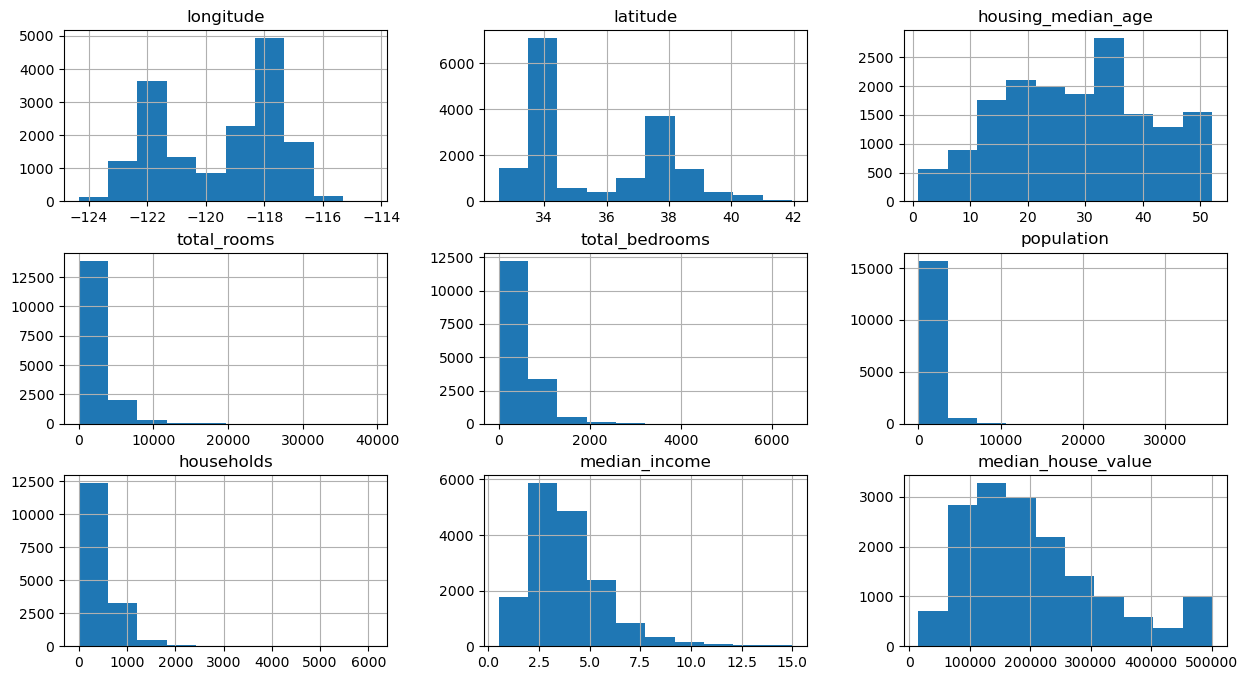

In [131]:
train_data.hist(figsize = (15, 8))

In [132]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924208,-0.105761,0.039195,0.062865,0.093392,0.050203,-0.018307,-0.047245
latitude,-0.924208,1.000000,0.008494,-0.030780,-0.060316,-0.102744,-0.065519,-0.078983,-0.144308
housing_median_age,-0.105761,0.008494,1.000000,-0.361546,-0.323505,-0.297388,-0.305742,-0.117799,0.106578
total_rooms,0.039195,-0.030780,-0.361546,1.000000,0.932857,0.859043,0.922137,0.195778,0.126953
total_bedrooms,0.062865,-0.060316,-0.323505,0.932857,1.000000,0.880070,0.980757,-0.008507,0.043044
population,0.093392,-0.102744,-0.297388,0.859043,0.880070,1.000000,0.908017,0.001793,-0.030908
households,0.050203,-0.065519,-0.305742,0.922137,0.980757,0.908017,1.000000,0.012012,0.057482
median_income,-0.018307,-0.078983,-0.117799,0.195778,-0.008507,0.001793,0.012012,1.000000,0.687860
median_house_value,-0.047245,-0.144308,0.106578,0.126953,0.043044,-0.030908,0.057482,0.687860,1.000000


<AxesSubplot:>

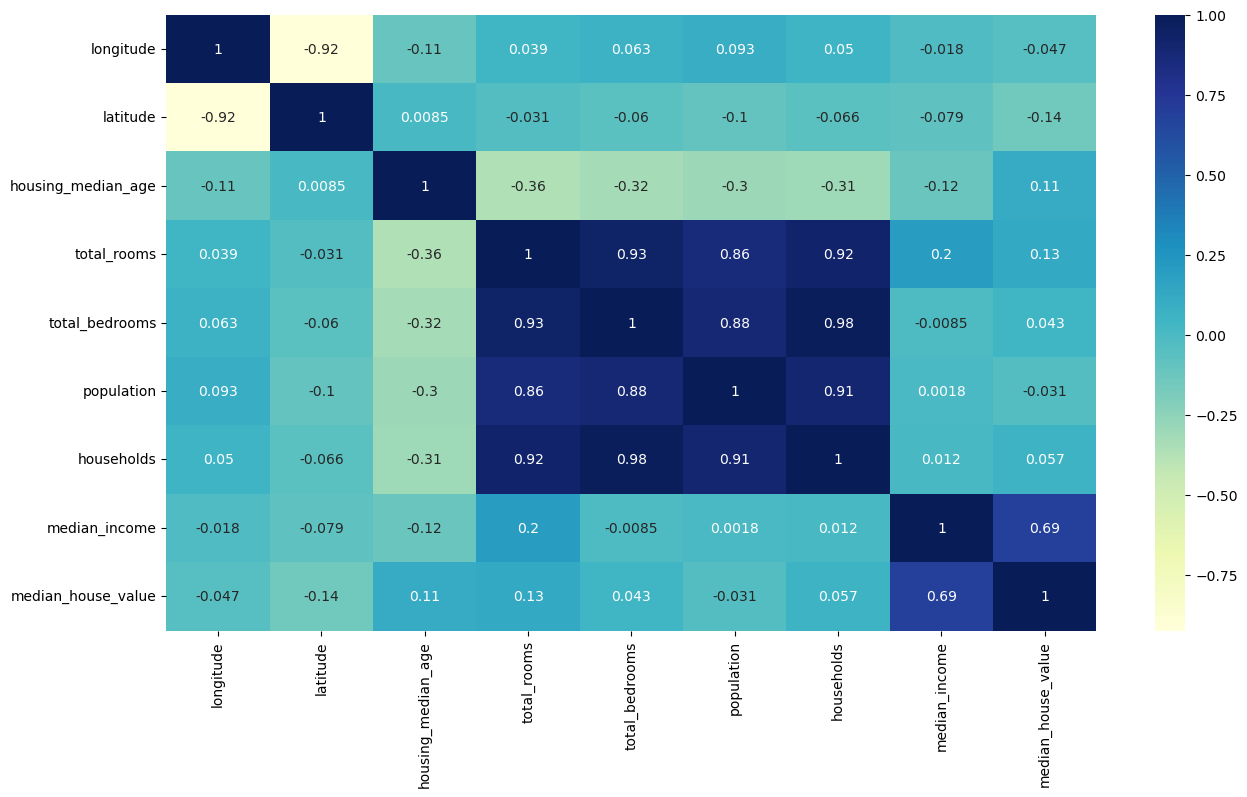

In [133]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [134]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)  #more gaussian distribution

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

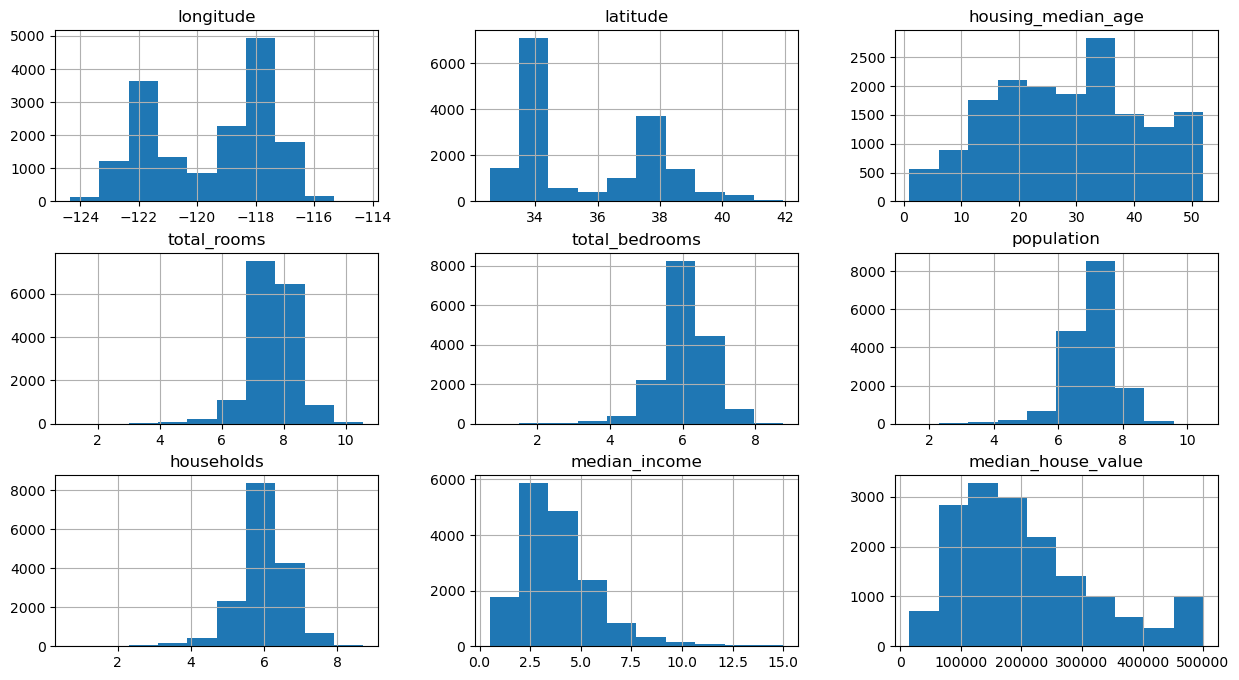

In [135]:
train_data.hist(figsize = (15, 8))

In [136]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7215
INLAND        5237
NEAR OCEAN    2106
NEAR BAY      1785
ISLAND           3
Name: ocean_proximity, dtype: int64

In [137]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)

<AxesSubplot:>

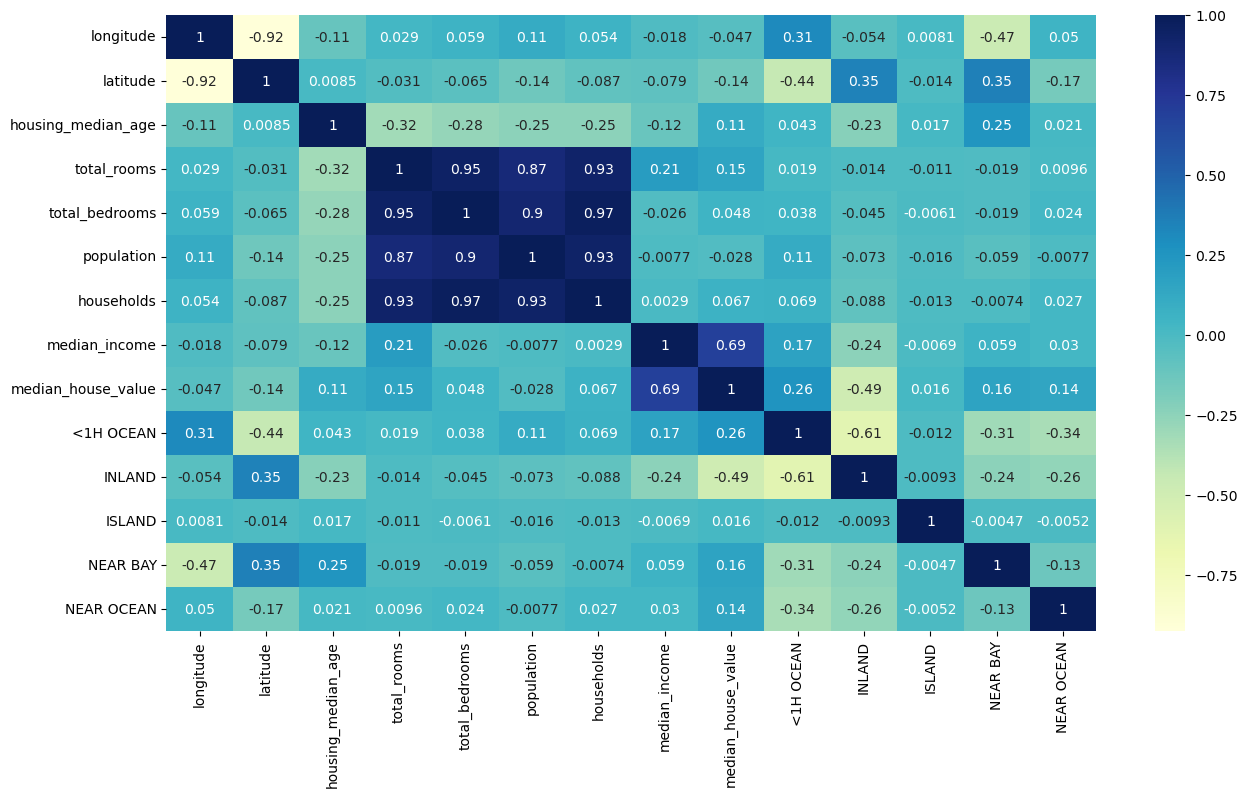

In [138]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

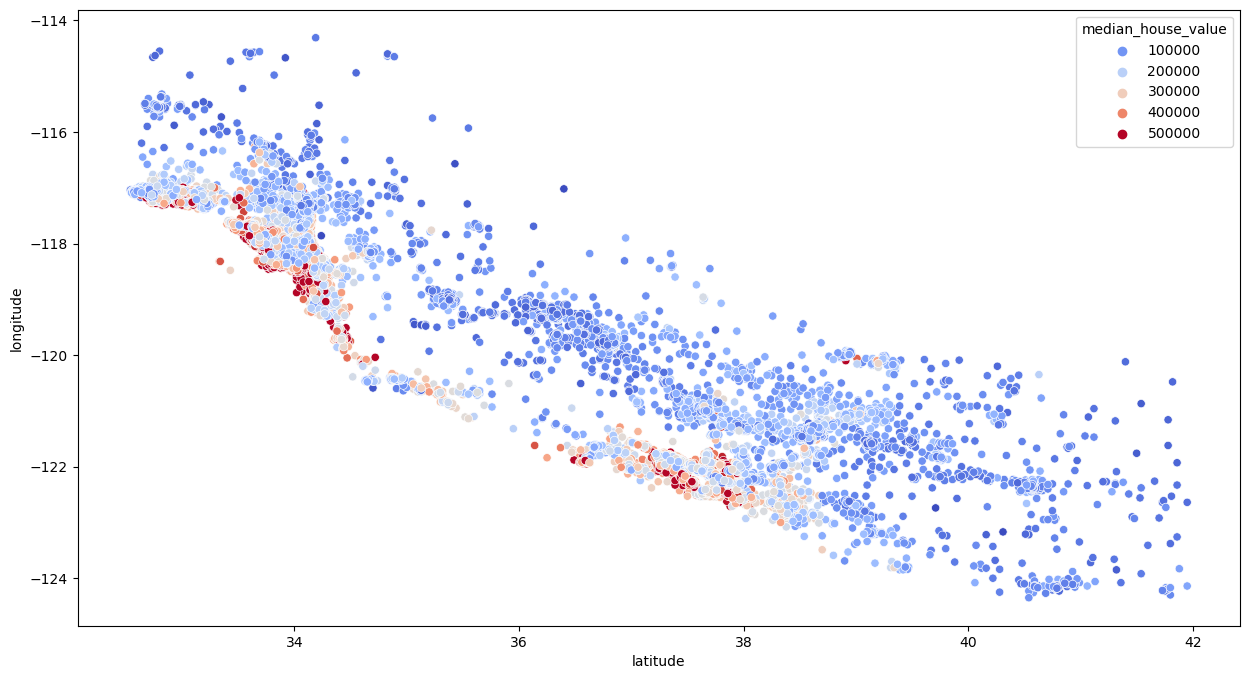

In [139]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")

In [140]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/train_data["households"]

<AxesSubplot:>

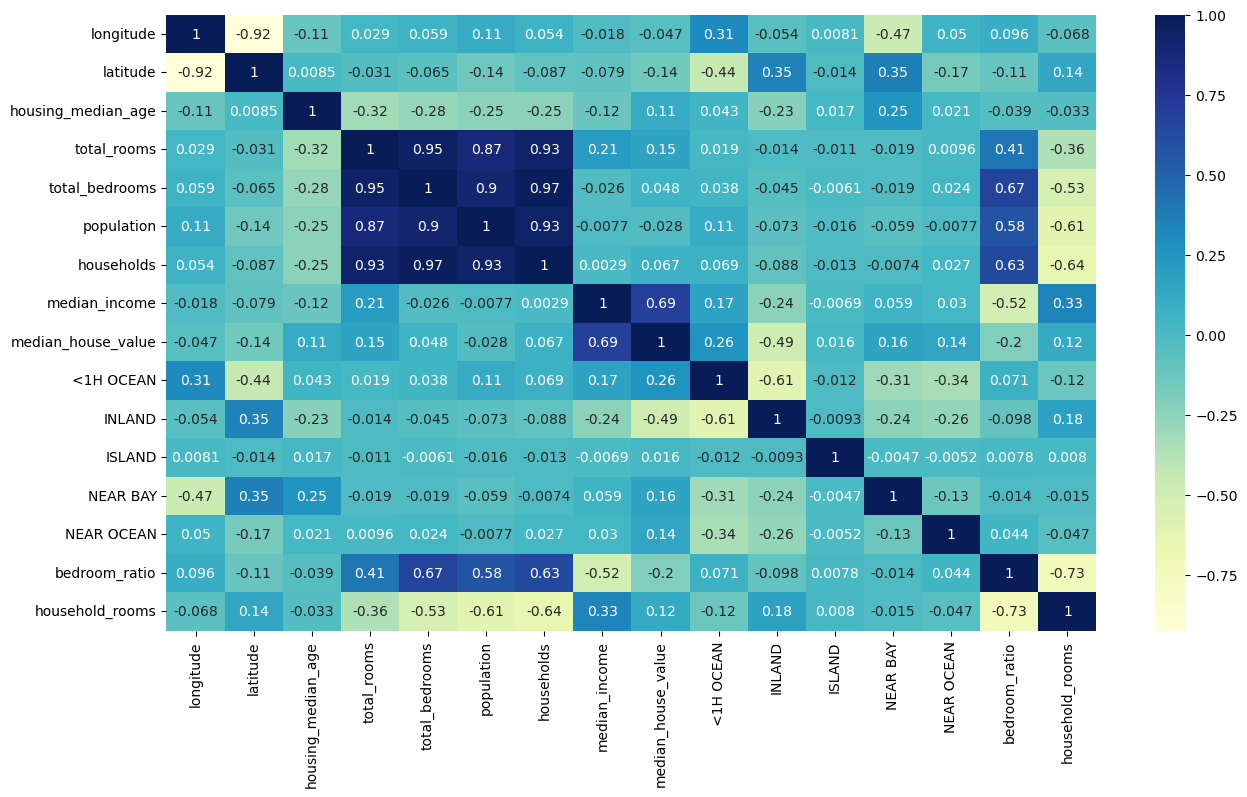

In [141]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, y_train = train_data.drop(["median_house_value"], axis = 1), train_data["median_house_value"]

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [143]:
reg.score(X_train, y_train)

0.6706651627832682

In [144]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
15133,-116.93,32.83,21.0,7.157735,5.631212,6.529419,5.669881,2.3203,1,0,0,0,0,0.786731,1.262414
3603,-118.47,34.23,22.0,9.030137,7.907652,9.119978,7.805067,2.5008,1,0,0,0,0,0.875696,1.156958
13823,-117.20,34.50,10.0,8.343316,6.746412,7.774436,6.695799,2.1781,0,1,0,0,0,0.808601,1.246052
11669,-118.01,33.86,29.0,7.744137,6.115892,7.105786,5.998937,3.4306,1,0,0,0,0,0.789745,1.290918
7201,-118.18,34.02,36.0,7.037906,5.693732,7.303170,5.771441,2.2813,1,0,0,0,0,0.809009,1.219437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,-118.23,33.93,30.0,7.045777,5.564520,7.106606,5.351858,2.0658,1,0,0,0,0,0.789767,1.316510
13248,-117.65,34.11,29.0,7.982075,6.453625,7.444833,6.436150,3.6219,0,1,0,0,0,0.808515,1.240194
8404,-118.36,33.93,30.0,7.032624,5.852202,7.268223,5.834811,2.6800,1,0,0,0,0,0.832151,1.205287
18481,-121.61,37.06,21.0,8.579792,6.812345,8.010360,6.797940,5.5936,1,0,0,0,0,0.793999,1.262116


In [145]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3151,-118.61,34.99,11.0,4031.0,766.0,1539.0,564.0,3.8917,INLAND
5522,-118.39,33.96,45.0,1436.0,374.0,662.0,292.0,3.6250,<1H OCEAN
4469,-118.16,34.09,50.0,1568.0,302.0,1093.0,333.0,3.1442,<1H OCEAN
5692,-118.24,34.23,42.0,1541.0,280.0,753.0,264.0,5.1028,<1H OCEAN
10770,-117.90,33.66,13.0,1642.0,423.0,841.0,368.0,3.6042,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
4183,-118.23,34.13,48.0,737.0,166.0,462.0,131.0,3.5893,<1H OCEAN
9481,-123.34,39.39,18.0,2821.0,628.0,1636.0,615.0,2.3333,<1H OCEAN
15209,-117.08,33.01,5.0,5659.0,931.0,2565.0,902.0,6.1949,<1H OCEAN
7362,-118.19,33.97,27.0,2911.0,972.0,3559.0,945.0,1.9485,<1H OCEAN


In [146]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1) 

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/test_data["households"]

In [147]:
X_test, y_test = test_data.drop(["median_house_value"], axis = 1), test_data["median_house_value"]

In [148]:
reg.score(X_test, y_test)

0.6721701770744689

In [152]:
reg.score(X_train, y_train)

0.6706651627832682